# Import Libraries

In [1]:
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import pandas as pd
import numpy as np 
import seaborn as sns                 
import matplotlib.pyplot as plt             
#%matplotlib inline     
sns.set(color_codes=True)
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import PercentFormatter

# Import Dataset

In [2]:
df=pd.read_csv("E:\MASTERS\Term 3-Winter 1\Advance topics in Inf Sys\Group Project\BankChurners.csv")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.info

<bound method DataFrame.info of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income

In [5]:
#data type
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [7]:
df.shape

(10127, 23)

In [8]:
# Drop Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 and 2
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [9]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [10]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# EDA

# Correlation

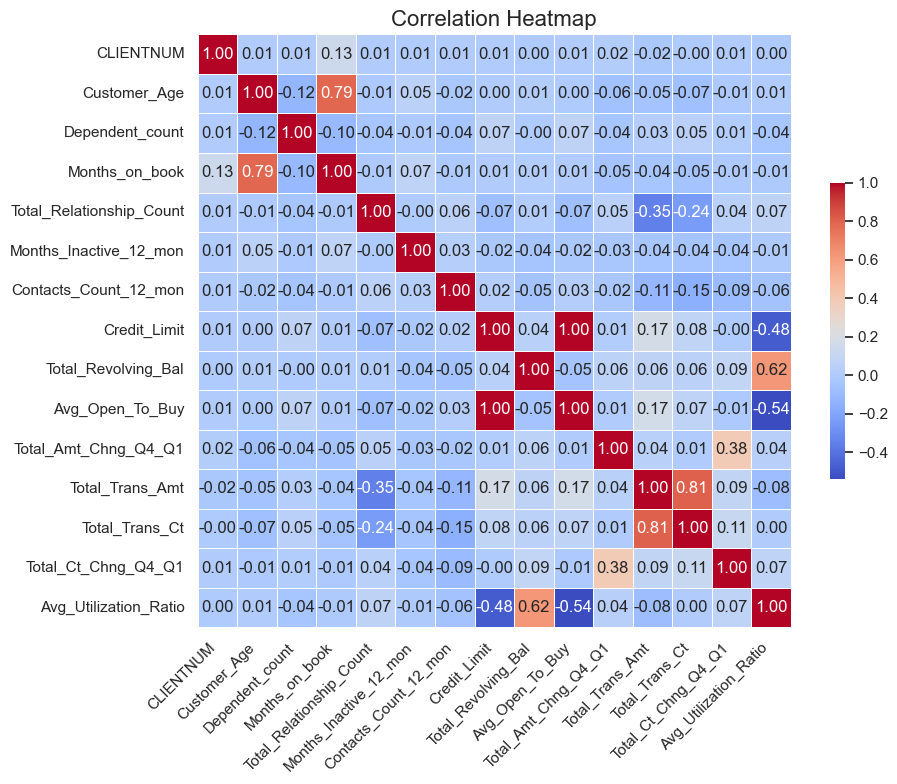

In [11]:

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size for better readability
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar_kws={'shrink': .5}, 
            square=True, linewidths=.5, annot_kws={"size": 12})

plt.title('Correlation Heatmap', fontsize=16)  # Title for the heatmap
plt.xticks(rotation=45, ha="right")  # Improve the readability of x labels
plt.yticks(rotation=0)  # Improve the readability of y labels
plt.tight_layout()  # Adjust the layout to make room for the rotated x-labels
plt.show()


# Univariate Variable Analysis

In [12]:
def column_information(dataframe, cat_th=10, car_th=20):
    # Identify object columns and numeric columns with few unique values as categorical
    categoric_columns = [col for col in dataframe.columns if dataframe[col].dtype == "object" or 
                         (dataframe[col].nunique() < cat_th and dataframe[col].dtype != "O")]
    
    # Identify numeric columns, excluding those considered as categorical due to low unique value count
    numerical_columns = [col for col in dataframe.columns if dataframe[col].dtype != "object" and 
                         dataframe[col].nunique() >= cat_th]
    
    # Exclude categorical columns with too many unique values (considered cardinal and not practical for certain categorical treatments)
    categoric_columns = [col for col in categoric_columns if col not in 
                         [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtype == "object"]]
    
    return categoric_columns, numerical_columns

# Example usage:
categoric_columns, numerical_columns = column_information(df)
print("Categorical Columns:", categoric_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['Attrition_Flag', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
Numerical Columns: ['CLIENTNUM', 'Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


# Categorical Features

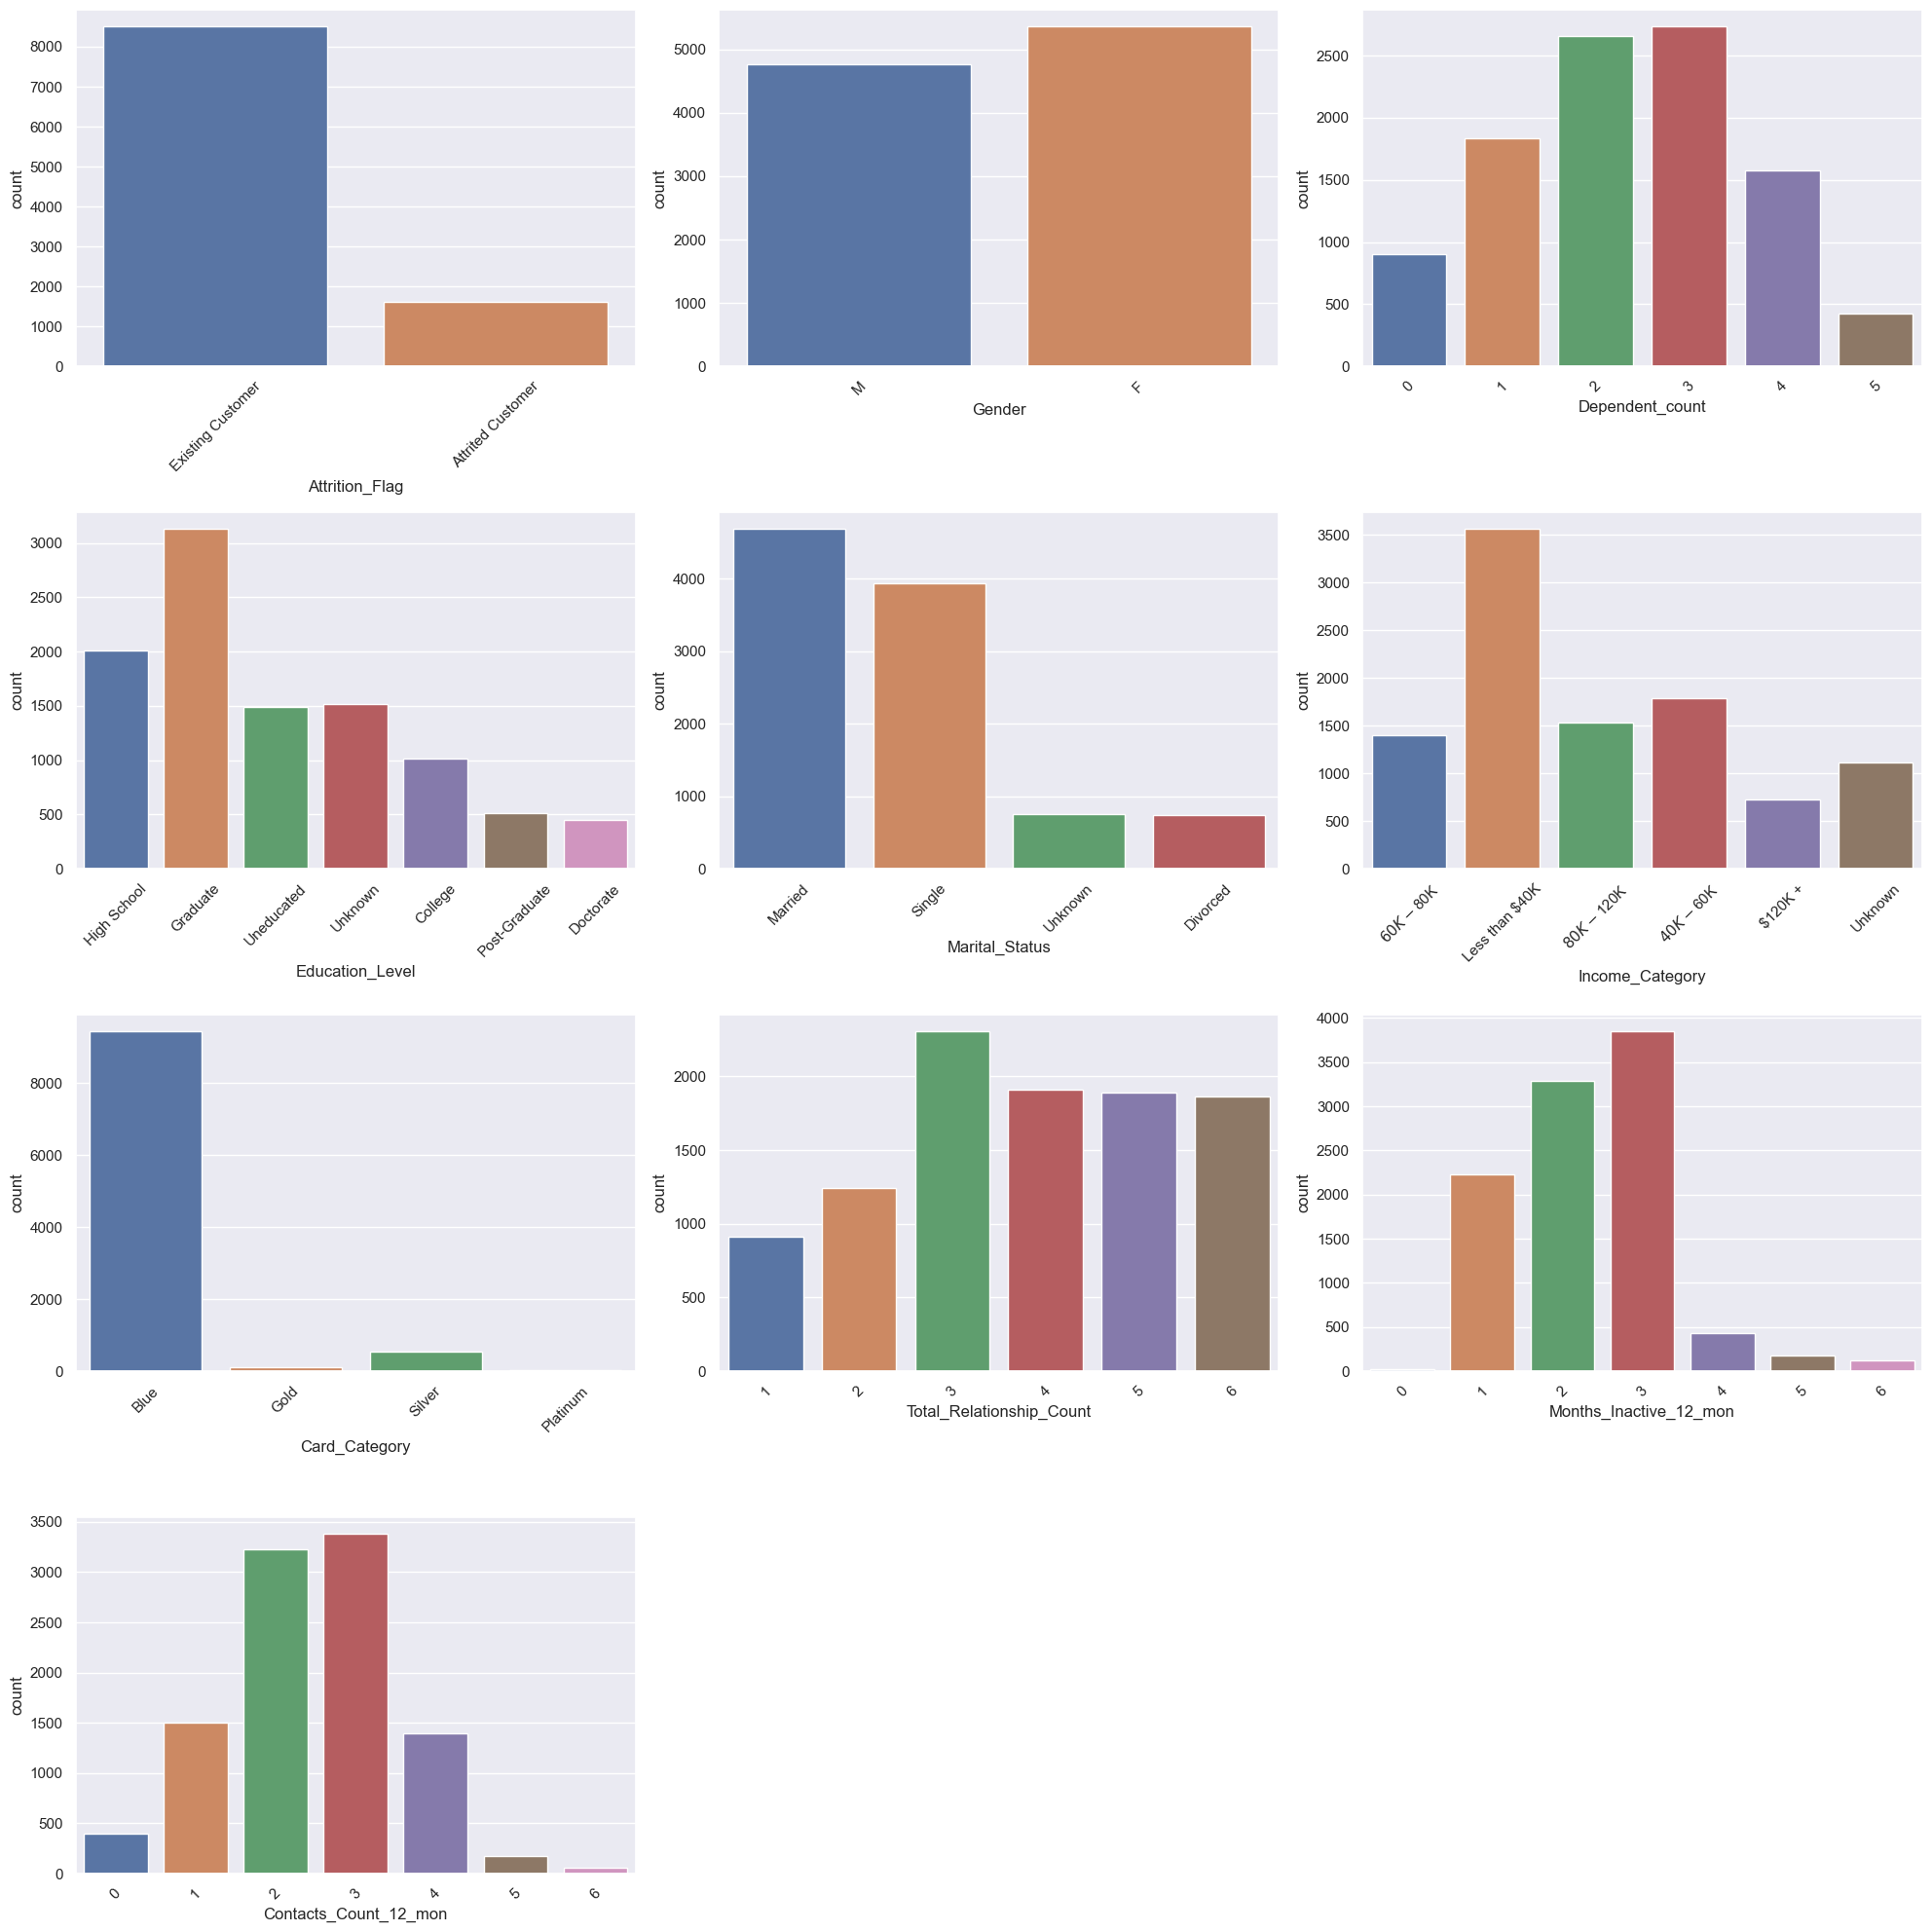

In [13]:
# Calculate the number of rows required in the subplot grid
cnum_cols = len(categoric_columns)
cnum_rows = cnum_cols // 3 + (cnum_cols % 3 > 0)

# Create the subplot grid
fig, axes = plt.subplots(nrows=cnum_rows, ncols=3, figsize=(20, 5 * cnum_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create bar plots for each categorical column
for i, col in enumerate(categoric_columns):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Numerical Features

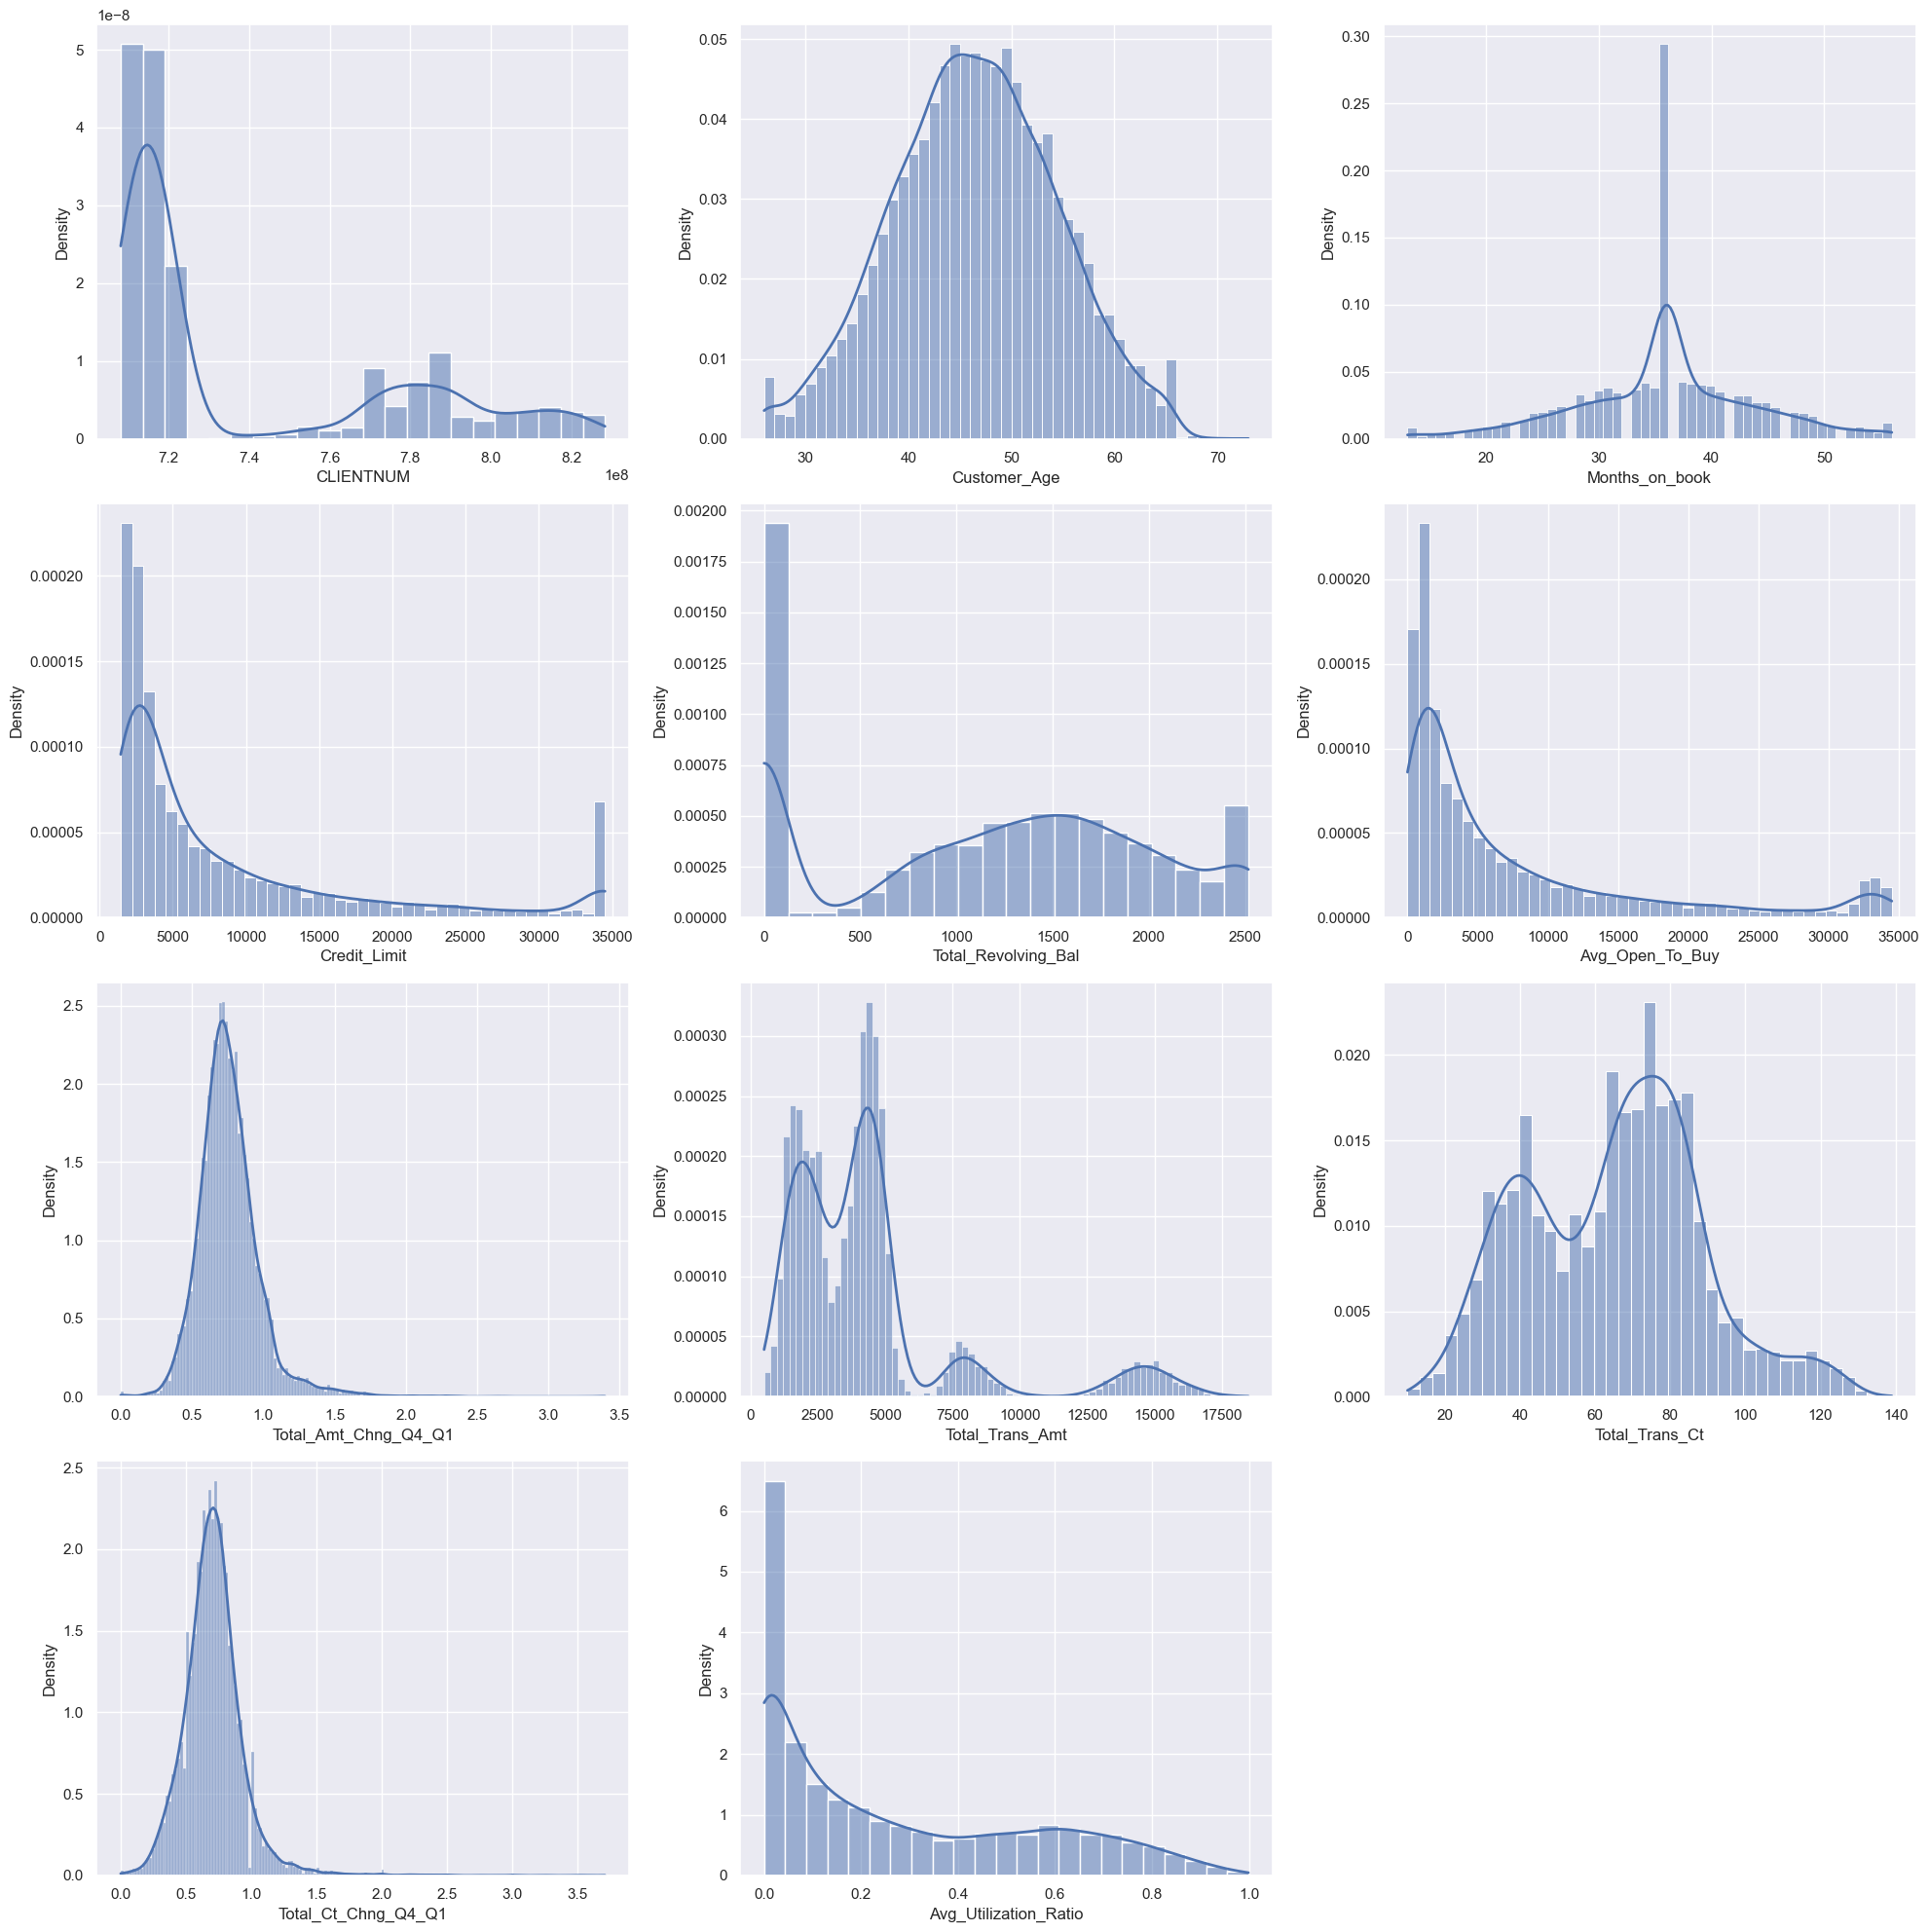

In [14]:
# Calculating the number of rows required in the subplot grid
num_cols = len(numerical_columns)
num_rows = num_cols // 3 + (num_cols % 3 > 0)

# Creating the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Creating histograms with KDE for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], stat='density', ax=axes[i], kde=True, line_kws={'linewidth': 2})

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. Customer age generally exhibit normal distributions.
2. The dataset has a slightly higher number of female samples, indicating a nearly uniform gender distribution.
3. Assuming 'unknown' education status implies no formal education, over 70% of customers possess formal education, with 35% having advanced degrees.
4. Approximately half the customers are married, with the other half mostly single and a small 7% being divorced.
5. The total transactions over the last 12 months show a multimodal distribution, suggesting distinct subgroups within the data.

# Churn Percentage

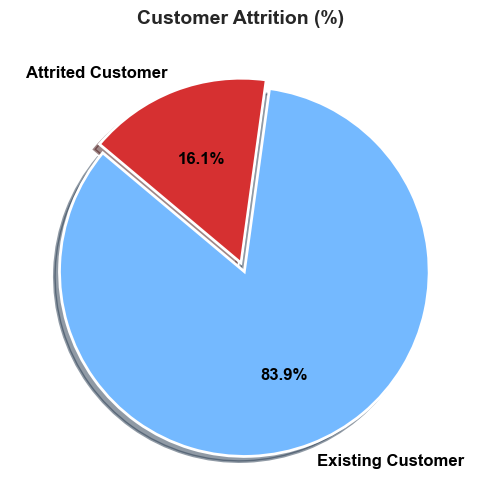

In [15]:
# Calculate the value counts for the 'Attrition_Flag' column in the sample data
n = df['Attrition_Flag'].value_counts().tolist()
total_count = sum(n)
proc = [n[0] / total_count * 100, n[1] / total_count * 100]

# Creating the pie chart with the specified look and feel
plt.figure(figsize=(8, 6))
plt.pie(proc, 
        labels=['Existing Customer', 'Attrited Customer'], 
        autopct='%1.1f%%',  # Show percentage with one decimal
        startangle=140,  # Start angle for the first segment
        explode=(0.05, 0),  # Slightly explode the 'Existing Customer' slice for emphasis
        shadow=True,  # Add a shadow for a 3D look
        colors=['#74b9ff', '#d63031'],  # Custom color scheme: blue for Existing Customer, red for Attrited Customer
        wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'linestyle': 'solid', 'antialiased': True},
        textprops={'color': "black", 'fontsize': 12, 'weight': 'bold'})  # Text properties
plt.title('Customer Attrition (%)', fontsize=14, fontweight='bold')
plt.show()

83.9% observations belong to Existing and
16.1% observations belong to the Attrited class
There is a clear class imbalance: the data is distributed 6 to 1

# Churn on Numerical

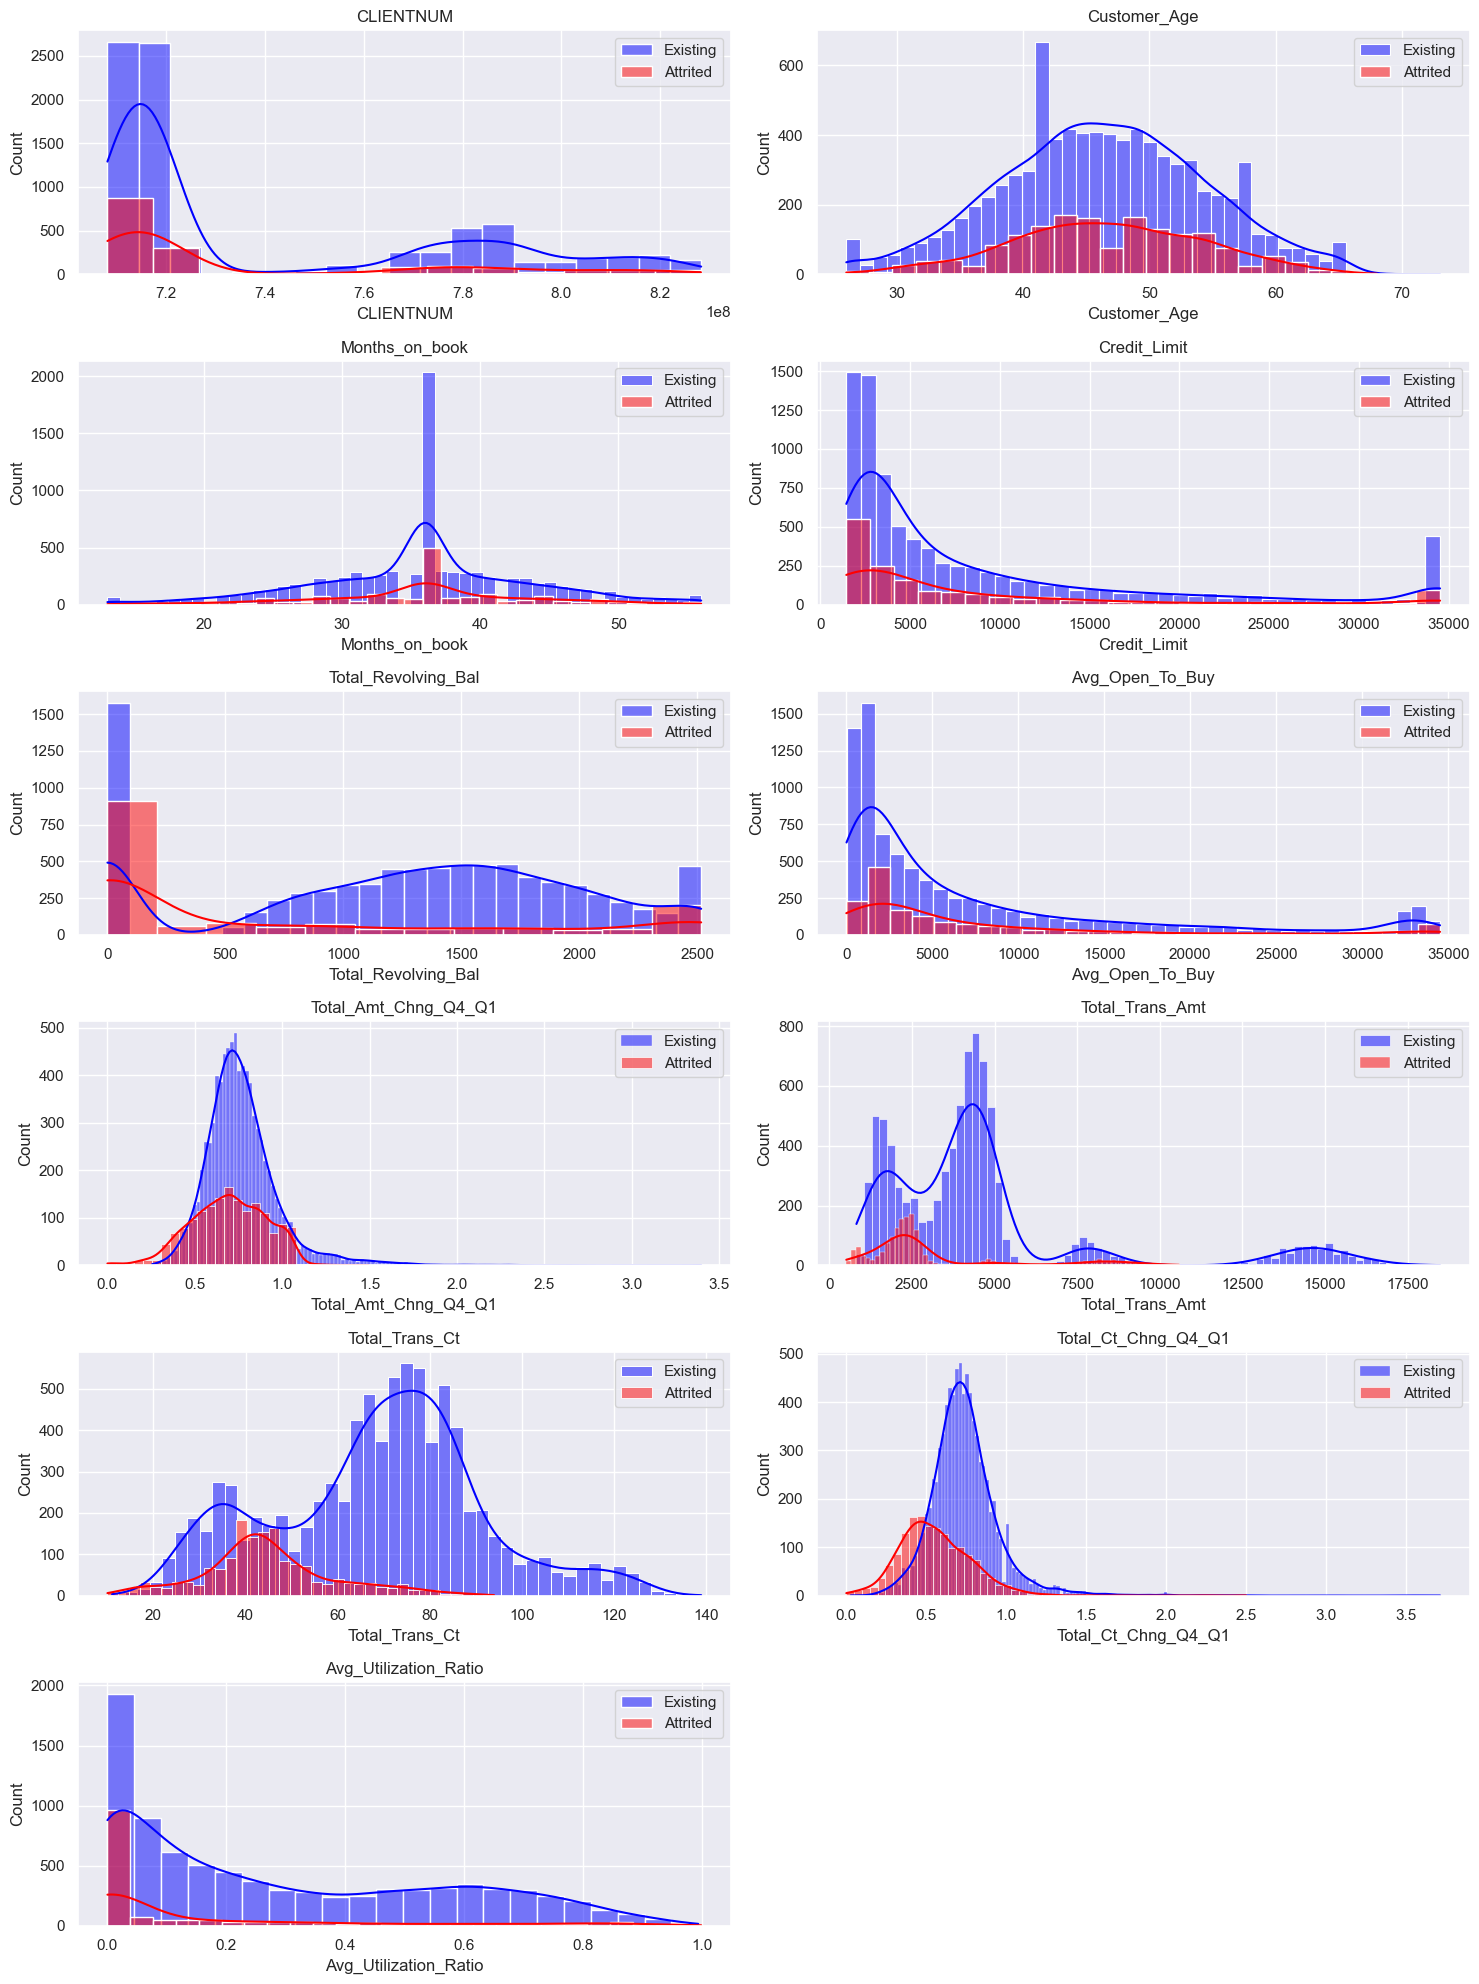

In [16]:
sns.set_palette("deep")

plt.figure(figsize=(15, num_rows * 5))  # Adjust the figure size based on the number of rows

# Adjust the number of subplots based on the number of numerical columns you have
num_plots = len(numerical_columns)
num_rows = num_plots // 2 if num_plots % 2 == 0 else (num_plots // 2) + 1

for i, feature in enumerate(numerical_columns):
    plt.subplot(num_rows, 2, i + 1)  # Adjust for the appropriate number of rows and columns

    # Filter the data for the histogram
    sns.histplot(data=df[df['Attrition_Flag'] == 'Existing Customer'], x=feature, kde=True, color="blue", label='Existing')
    sns.histplot(data=df[df['Attrition_Flag'] == 'Attrited Customer'], x=feature, kde=True, color="red", label='Attrited')
    
    plt.legend()  # Show the legend
    plt.title(feature)  # Set the title to the feature name

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


<Figure size 640x480 with 0 Axes>

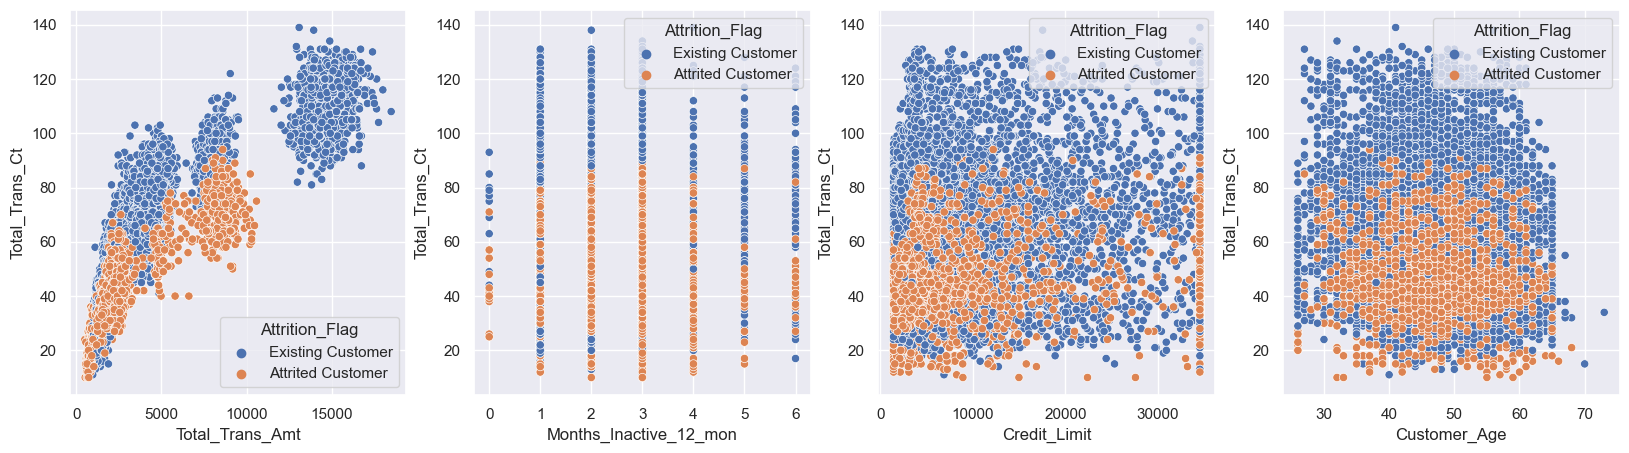

In [17]:
plt.clf()  # Clear the current figure
df_frequency = pd.concat([df['Customer_Age'], df['Total_Trans_Ct'], df['Total_Trans_Amt'],
                          df['Months_Inactive_12_mon'], df['Credit_Limit'], df['Attrition_Flag']], axis=1)
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
sns.scatterplot(data=df_frequency, y="Total_Trans_Ct", x="Total_Trans_Amt", hue="Attrition_Flag", ax=ax[0])
sns.scatterplot(data=df_frequency, y="Total_Trans_Ct", x="Months_Inactive_12_mon", hue="Attrition_Flag", ax=ax[1])
sns.scatterplot(data=df_frequency, y="Total_Trans_Ct", x="Credit_Limit", hue="Attrition_Flag", ax=ax[2])
sns.scatterplot(data=df_frequency, y="Total_Trans_Ct", x="Customer_Age", hue="Attrition_Flag", ax=ax[3])
plt.show()  # Show the plot


1. Higher spenders are less likely to churn.
2. Inactivity beyond 2-3 months increases churn risk.
3. Customers with larger credit limits tend to stay.
4. Age seems to have little impact on churn.
5. Customers with under 100 transactions are more likely to churn.

# Churn on Categorical

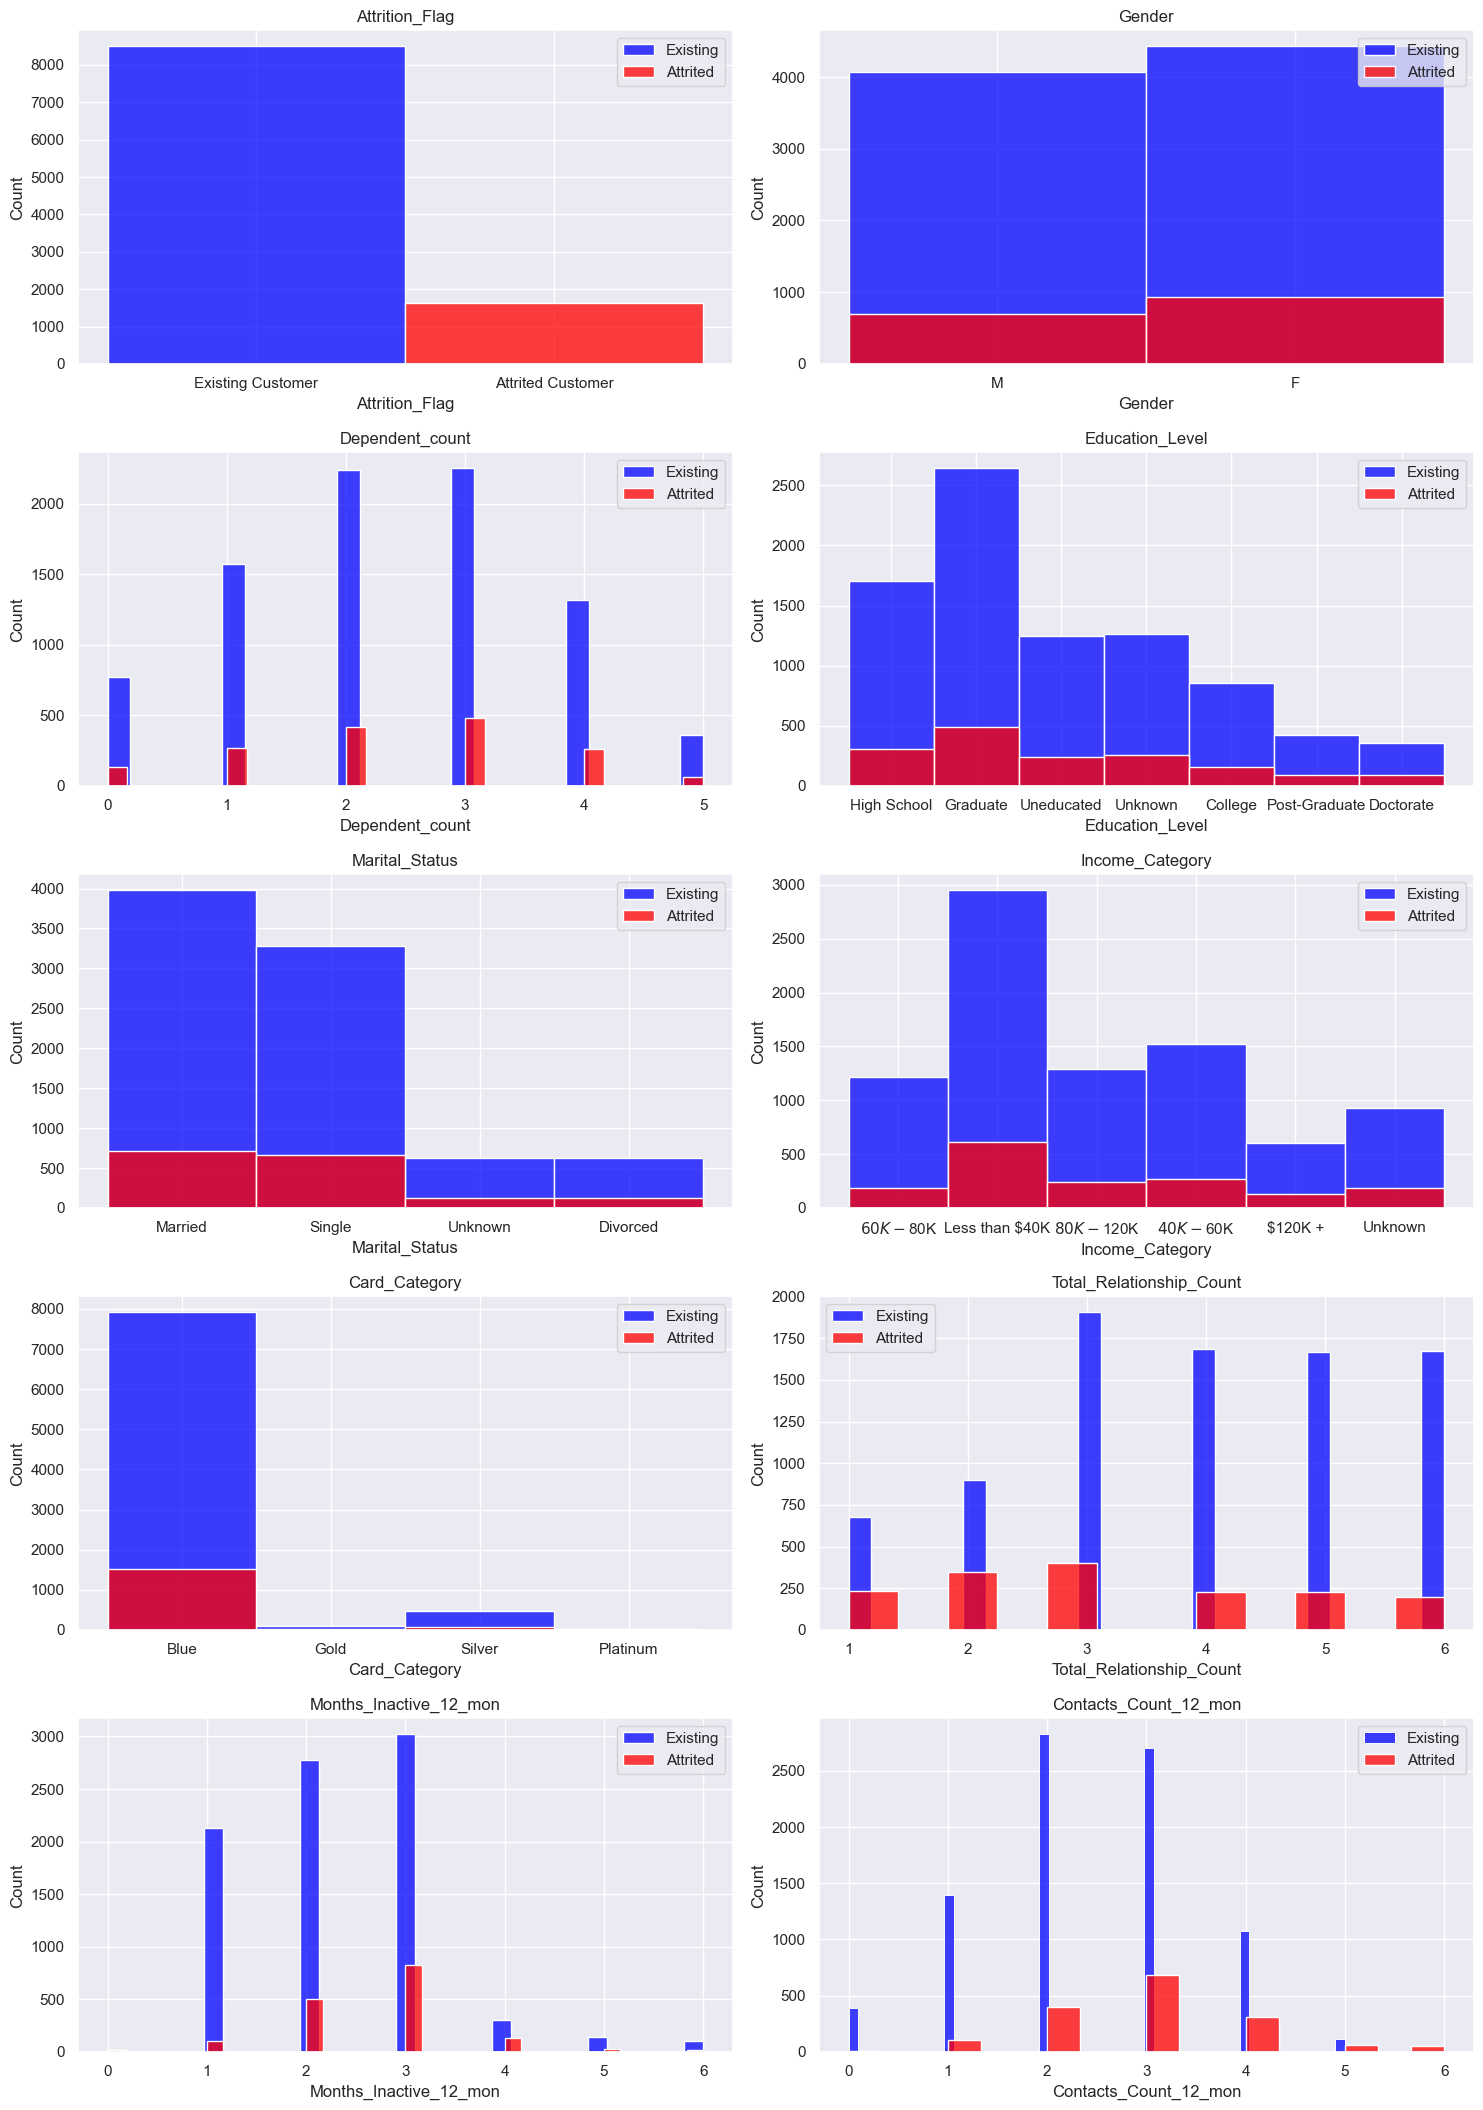

In [18]:
sns.set_palette("deep")

cnum_plots = len(categoric_columns)  # The actual number of numerical columns
cnum_rows = cnum_plots // 2 + (cnum_plots % 2 > 0)  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * cnum_rows))  # Adjust the figure size based on the number of rows

for i, feature in enumerate(categoric_columns):
    plt.subplot(num_rows, 2, i + 1)  # Create a subplot for each feature

    # Filter the data for the histogram
    sns.histplot(data=df[df['Attrition_Flag'] == 'Existing Customer'], x=feature, color="blue", label='Existing')
    sns.histplot(data=df[df['Attrition_Flag'] == 'Attrited Customer'], x=feature, color="red", label='Attrited')
    
    plt.legend()  # Show the legend
    plt.title(feature)  # Set the title to the feature name

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


While the figures indeed show some disparity in numbers between attrited and existing customers, the distribution of each category is very similar.

# Digging deep in to the variable interactions

# Income level vs  Revolving Balance & Credit Limit


<Figure size 1400x800 with 0 Axes>

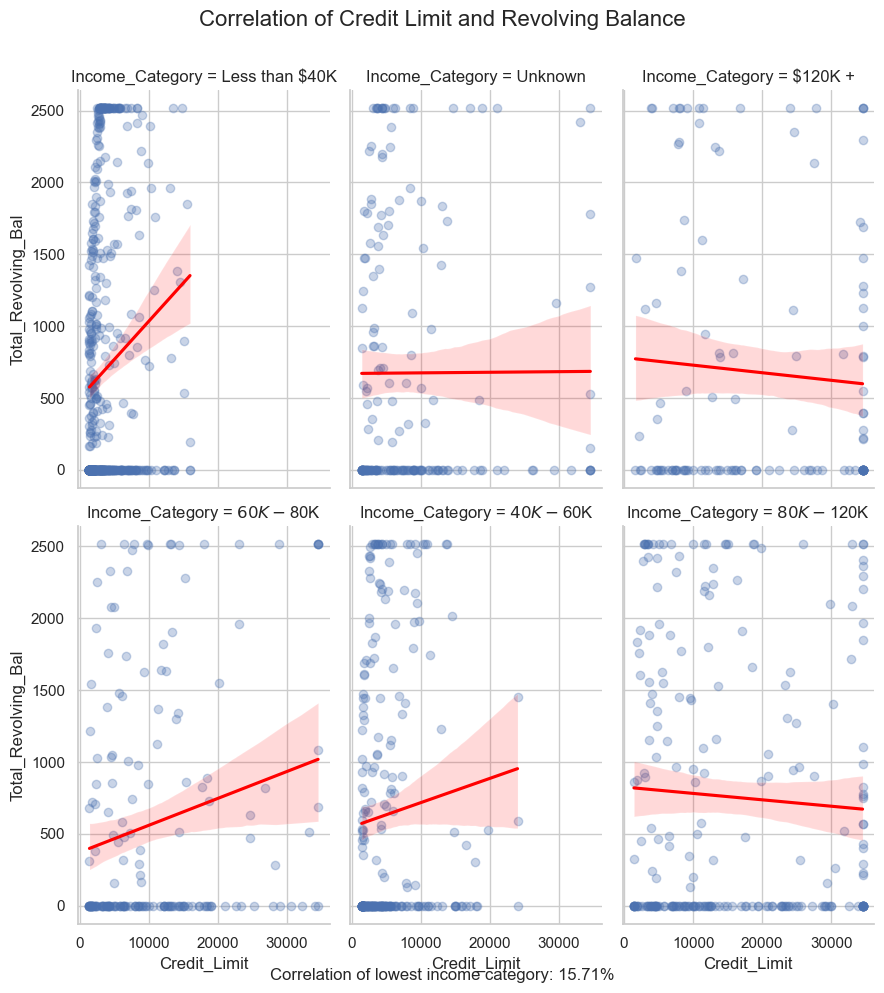

In [ ]:
# Filter for 'Less than $40K' income category and 'Attrited Customer'
lowest_income_cat_df = df[(df['Income_Category'] == 'Less than $40K') & (df['Attrition_Flag'] == 'Attrited Customer')]

# Calculate the correlation for this subset
correlation = lowest_income_cat_df['Credit_Limit'].corr(lowest_income_cat_df['Total_Revolving_Bal'])
correlation_percent = "{:.2%}".format(correlation)

# Filter for 'Attrited Customer' and plot
attrited_df = df[df['Attrition_Flag'] == 'Attrited Customer']

# Start plotting
plt.figure(figsize=(14, 8))
sns.lmplot(x='Credit_Limit', y='Total_Revolving_Bal', col='Income_Category',
           data=attrited_df, aspect=0.6, col_wrap=3,
           scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})

# Adjust the layout
plt.subplots_adjust(top=0.9)
plt.suptitle('Correlation of Credit Limit and Revolving Balance', fontsize=16)
plt.figtext(0.5, 0.01, f'Correlation of lowest income category: {correlation_percent}', ha='center', fontsize=12)

# Show the plot
plt.show()


Explore the lowest income category to see what was the level of revolving balance to this group-

1. The credit limit for the low income group was low for those attrited customers.
2. This group had a high revolving balance, which could be a reason why the credit limit for them was low.
3. There were individuals who attrited who did not have any revolving balance but had low credit limits. Could this be an explanation for attrition?

#  Income level vs Avg Utilization Ratio & Avg Trx Count


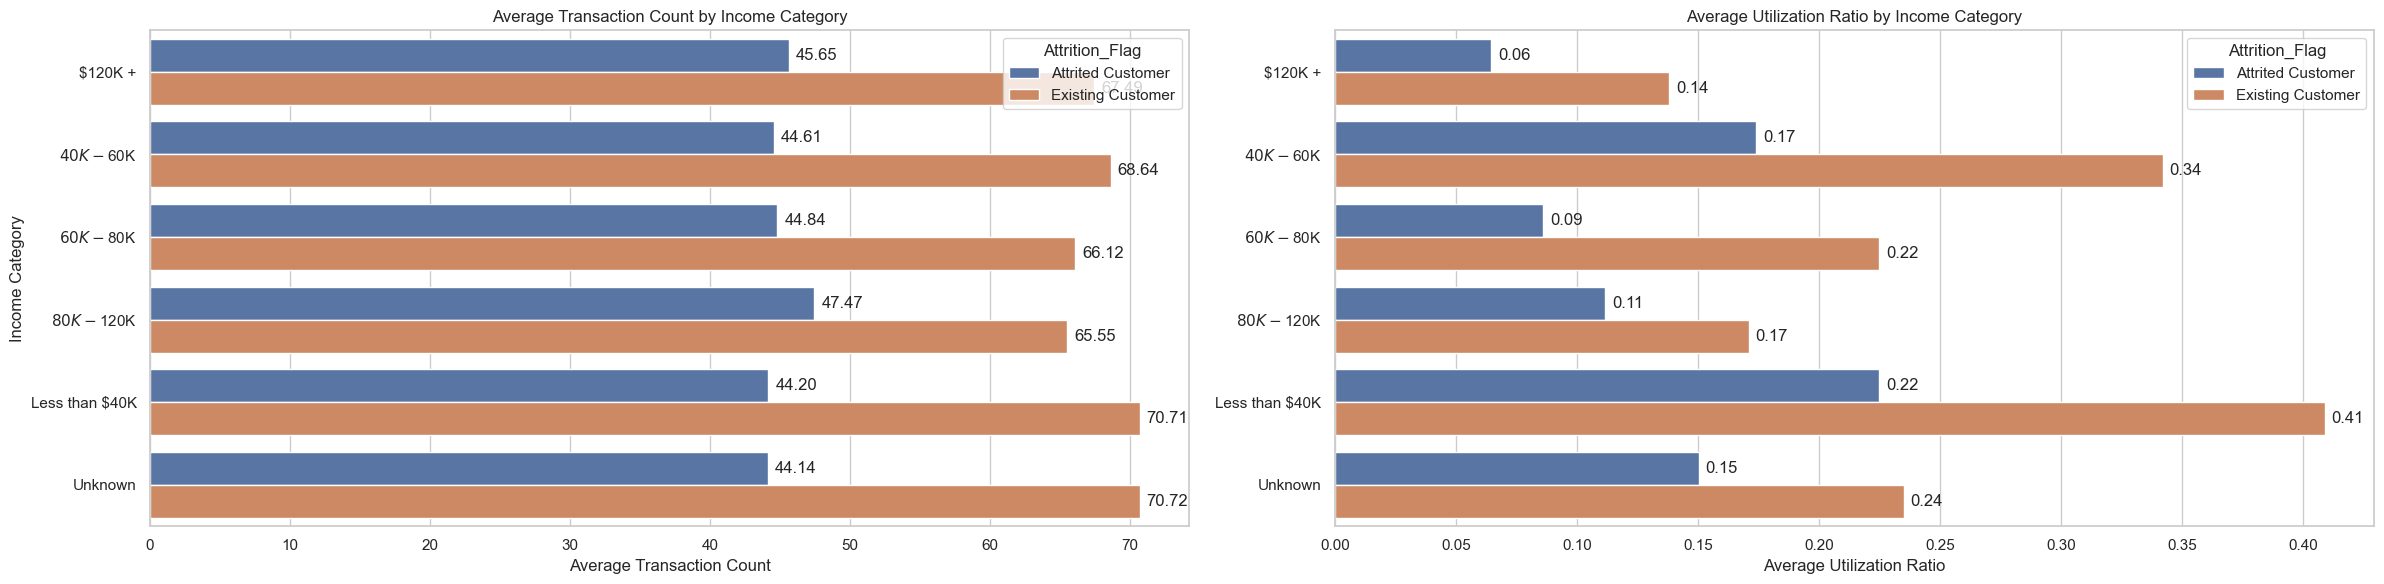

In [ ]:

# Summarize the data by income category and attrition flag
income_metrics = df.groupby(['Income_Category', 'Attrition_Flag']).agg(
    avg_trans_ct=pd.NamedAgg(column='Total_Trans_Ct', aggfunc='mean'),
    avg_utilization_ratio=pd.NamedAgg(column='Avg_Utilization_Ratio', aggfunc='mean')
).reset_index()

# Create two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Total Transaction Count plot
sns.barplot(x='avg_trans_ct', y='Income_Category', hue='Attrition_Flag', data=income_metrics, ax=axes[0])
axes[0].set_title('Average Transaction Count by Income Category')
axes[0].set_xlabel('Average Transaction Count')
axes[0].set_ylabel('Income Category')

# Average Utilization Ratio plot
sns.barplot(x='avg_utilization_ratio', y='Income_Category', hue='Attrition_Flag', data=income_metrics, ax=axes[1])
axes[1].set_title('Average Utilization Ratio by Income Category')
axes[1].set_xlabel('Average Utilization Ratio')
axes[1].set_ylabel('')

# Adding labels to the bars
for ax in axes:
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.2f'),
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center',
                    xytext=(5, 0), textcoords='offset points')

# Adjust the layout
plt.tight_layout()

# Show plot
plt.show()

The lower income category has a slightly larger utilization ratio as opposed to the other income categories- they are using the credit more

# Card Category

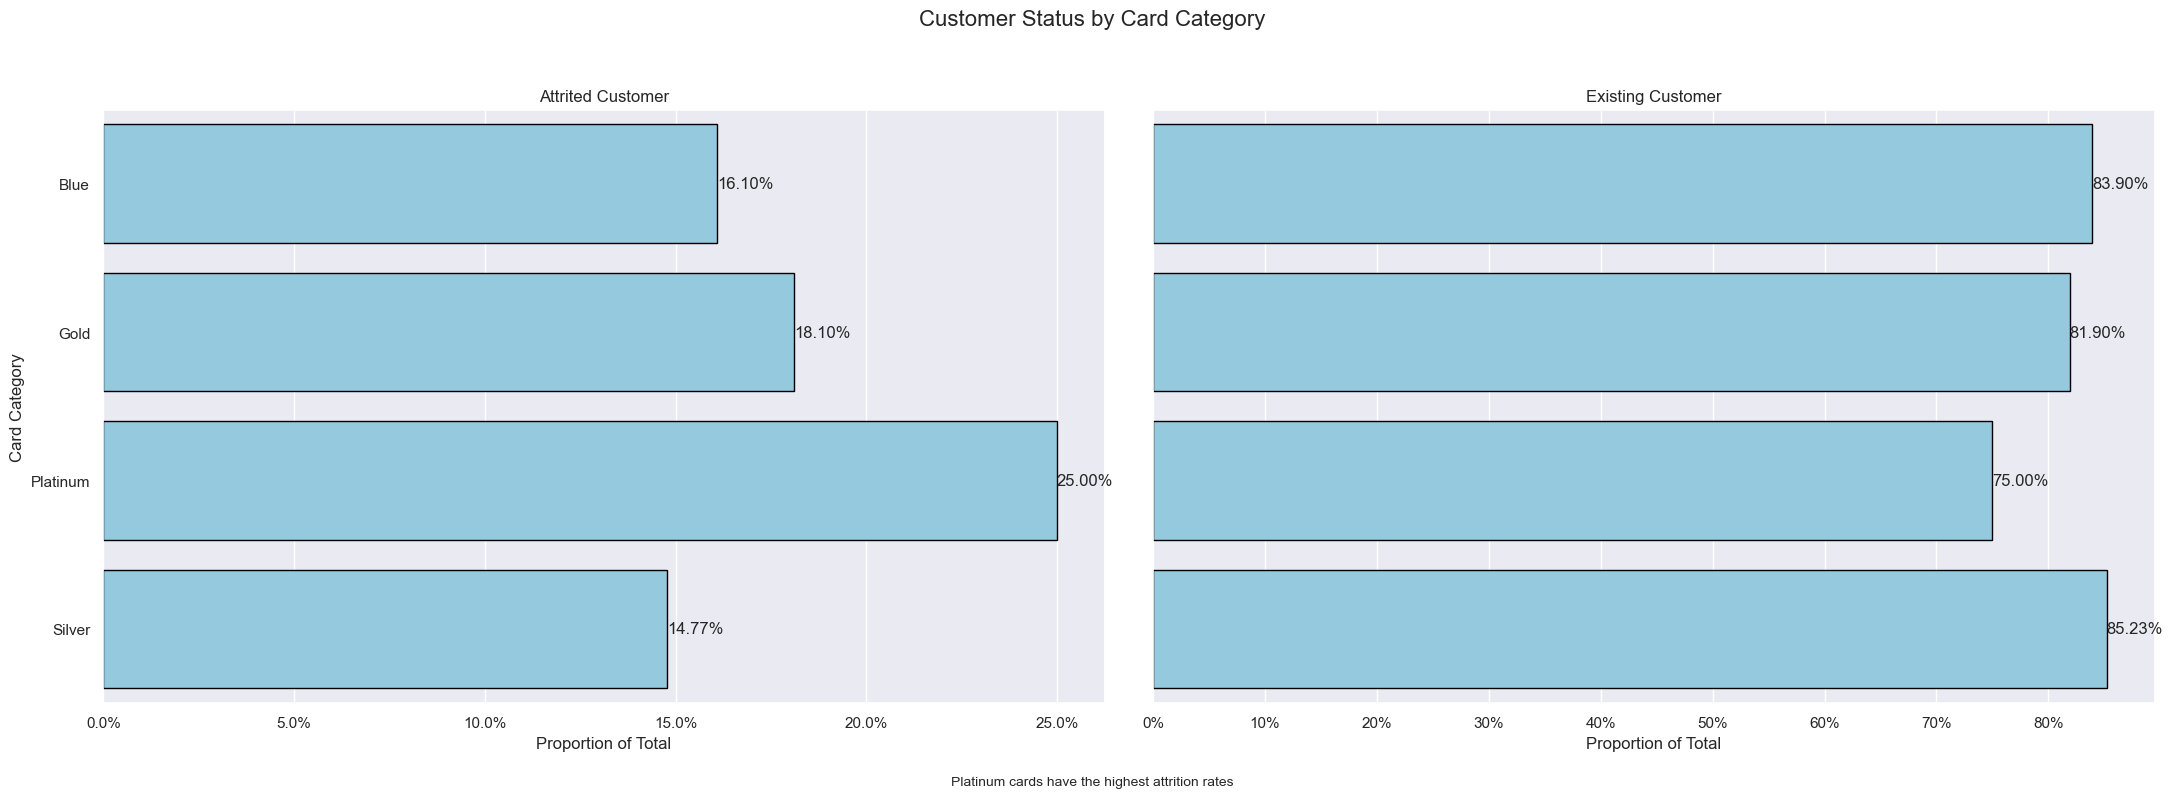

In [9]:

# Calculate the counts and percentages
card_category_attrition_df = df.groupby(['Attrition_Flag', 'Card_Category']) \
    .size() \
    .reset_index(name='counts')

# Calculate percentages
card_category_totals = card_category_attrition_df.groupby('Card_Category')['counts'].transform('sum')
card_category_attrition_df['pct'] = card_category_attrition_df['counts'] / card_category_totals

# Now we pivot the data to have separate columns for Attrited and Existing
card_category_pivot = card_category_attrition_df.pivot(index='Card_Category', columns='Attrition_Flag', values='pct').reset_index()

# Melt the pivot table back to long-form for seaborn
card_category_melted = pd.melt(card_category_pivot, id_vars='Card_Category', value_name='pct')

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(22, 8), sharey=True)

# Filter for 'Attrited' and 'Existing' and create plots
for i, attrition_status in enumerate(card_category_melted['Attrition_Flag'].unique()):
    data = card_category_melted[card_category_melted['Attrition_Flag'] == attrition_status]
    sns.barplot(x='pct', y='Card_Category', data=data, ax=axes[i], color="skyblue", edgecolor="black")
    axes[i].set_title(f"{attrition_status}")
    axes[i].xaxis.set_major_formatter(PercentFormatter(1))
    axes[i].set_xlabel('Proportion of Total')
    axes[i].set_ylabel('Card Category' if i == 0 else '')
    # Adding labels to the bars
    for p in axes[i].patches:
        width = p.get_width()
        axes[i].text(width, p.get_y() + p.get_height() / 2,
                     f"{width:.2%}",
                     va='center')

# Overall title and layout adjustment
plt.suptitle('Customer Status by Card Category', fontsize=16)
plt.figtext(0.5, 0.01, 'Platinum cards have the highest attrition rates', ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show plot
plt.show()


The highest percentage of attrition are coming from platinum and gold card users.

# Card Category & Transaction

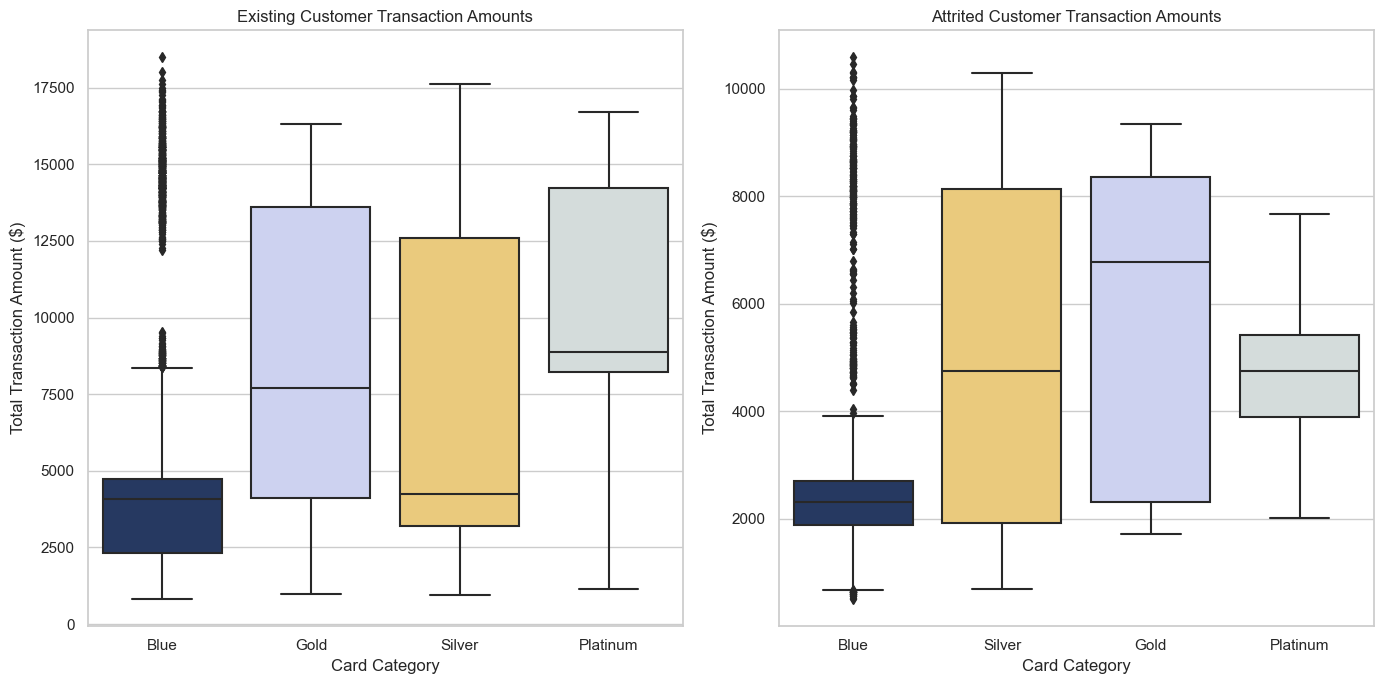

In [ ]:

# Create the side-by-side boxplot
plt.figure(figsize=(14, 7))

# Create a boxplot for Existing Customers
plt.subplot(1, 2, 1)
sns.boxplot(x='Card_Category', y='Total_Trans_Amt', data=df[df['Attrition_Flag'] == 'Existing Customer'],
            palette=color_dict)
plt.title('Existing Customer Transaction Amounts')
plt.ylabel('Total Transaction Amount ($)')
plt.xlabel('Card Category')

# Create a boxplot for Attrited Customers
plt.subplot(1, 2, 2)
sns.boxplot(x='Card_Category', y='Total_Trans_Amt', data=df[df['Attrition_Flag'] == 'Attrited Customer'],
            palette=color_dict)
plt.title('Attrited Customer Transaction Amounts')
plt.ylabel('Total Transaction Amount ($)')
plt.xlabel('Card Category')

# Show the plot
plt.tight_layout()
plt.show()



1. Churned/Attrited Platinum cardholders wshow significantly fewer total transactions, suggesting potential limitations in credit or lower income levels, as indicated by a lower median in transaction amounts compared to staying customers.

2. The transaction patterns for Gold cardholders are consistent regardless of attrition status, with no notable differences.

3. Observable clusters within certain card categories may imply a correlation between income levels and transaction volumes.

# Activity

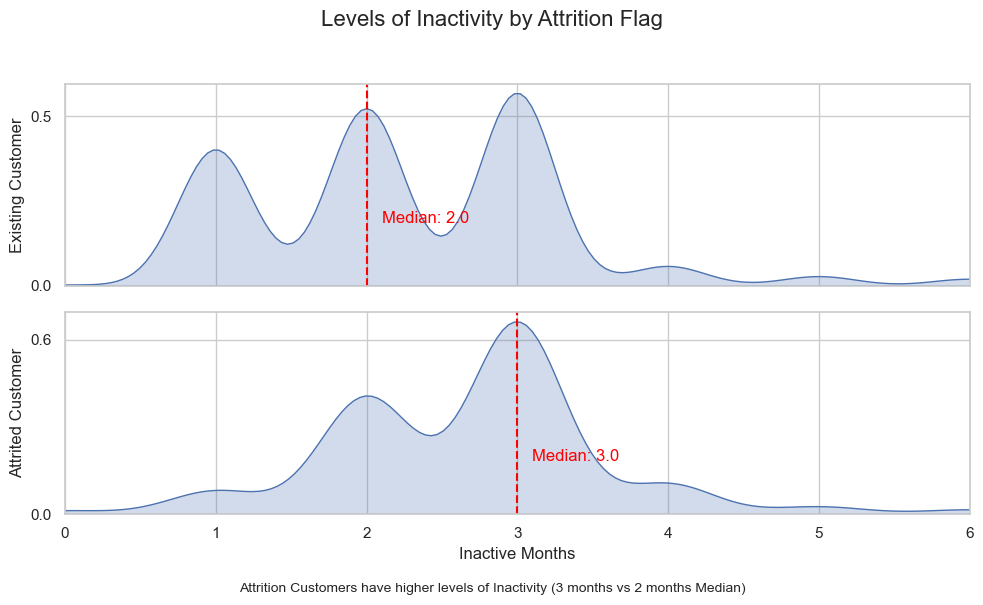

In [ ]:

# Prepare the data
attrition_df = df[['Attrition_Flag', 'Months_Inactive_12_mon']]

# Create the ridge plot
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

# Plot the density plots for each attrition flag
for i, attrition_flag in enumerate(attrition_df['Attrition_Flag'].unique()):
    # Select the subset of the DataFrame for the current attrition flag
    data_subset = attrition_df[attrition_df['Attrition_Flag'] == attrition_flag]
    
    # Create the KDE plot
    sns.kdeplot(data=data_subset, x='Months_Inactive_12_mon', fill=True, ax=axes[i], bw_adjust=1.5)
    
    # Draw the median line
    median = data_subset['Months_Inactive_12_mon'].median()
    axes[i].axvline(median, color='red', linestyle='--')
    
    # Customize the plot to make it look like a ridge plot
    axes[i].set_ylabel(attrition_flag)
    axes[i].yaxis.set_major_locator(MaxNLocator(nbins=1))
    axes[i].set_xlim(attrition_df['Months_Inactive_12_mon'].min(), attrition_df['Months_Inactive_12_mon'].max())

    # Annotate the median line
    axes[i].text(median + 0.1, 0.2, f'Median: {median}', color='red', ha='left', va='center')

# Set the title and labels
plt.suptitle('Levels of Inactivity by Attrition Flag', fontsize=16)
axes[-1].set_xlabel('Inactive Months')
plt.figtext(0.5, 0.01, "Attrition Customers have higher levels of Inactivity (3 months vs 2 months Median)", ha='center', fontsize=10)

# Tight layout often produces better-looking plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


1. The level of interactivity of Churned/Attrited has a median of three months, 1 month higher than those who still stay with the organization.
2. When the level of inactivity starts getting “beyond” the 2 month threshold, then there is a higher chance that the person will decide to leave the organization.